In [1]:
# Add soil model and other functions
#Pkg.add("Plots")
#Pkg.add("BackendPackage")
#Pkg.add("GR")!)
#using Pkg
using Plots

include("../Soil/Water/soil_water_properties.jl")
include("../Soil/Water/frozen_impedence_factor.jl")
include("../Soil/Water/temperature_dependence.jl")
include("../Soil/Water/matric_potential.jl")
include("../Soil/Water/pressure_head.jl")
include("../Soil/Water/hydraulic_head.jl")
include("../Soil/Water/effective_saturation.jl")
include("../Soil/Water/augmented_liquid.jl")
include("../Soil/Water/calculate_frozen_water.jl")
include("../Soil/Water/heaviside.jl")

heaviside (generic function with 1 method)

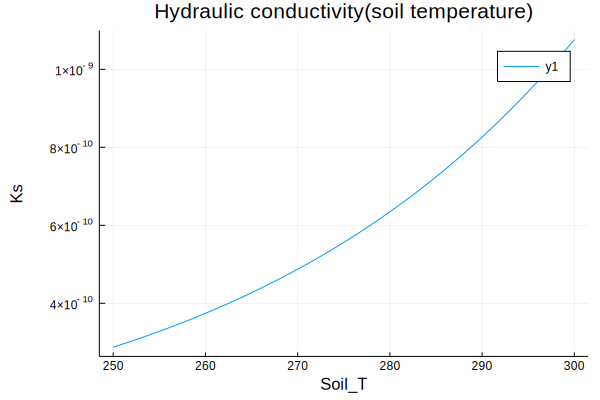

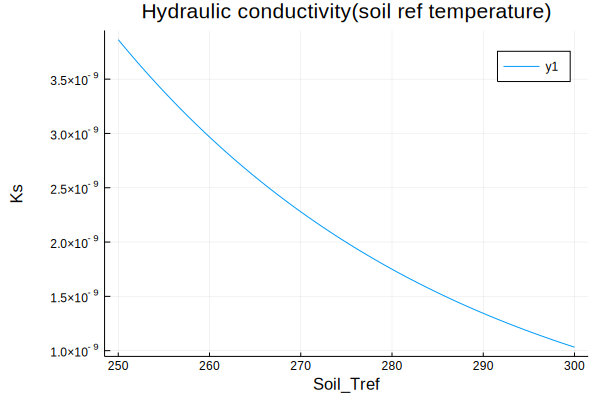

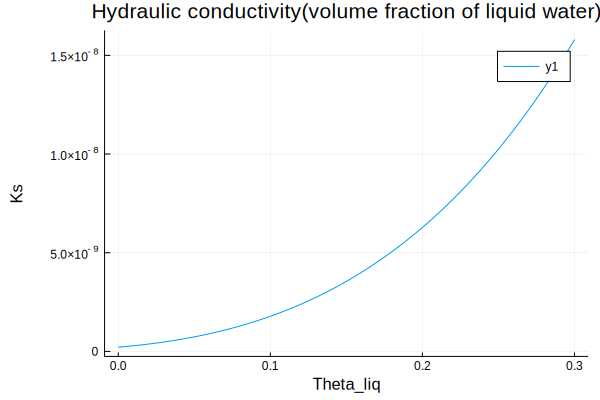

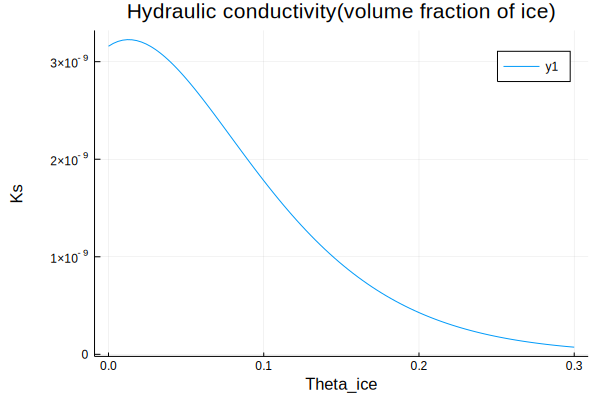

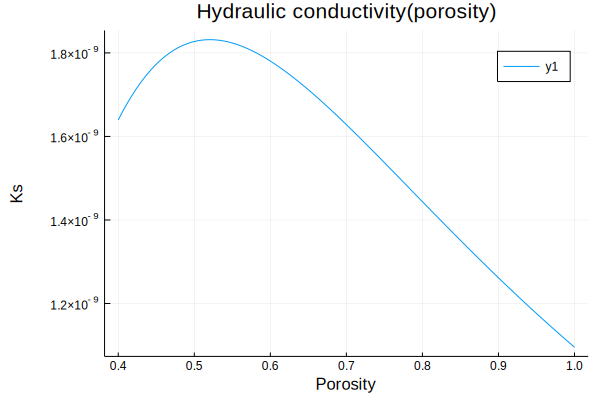

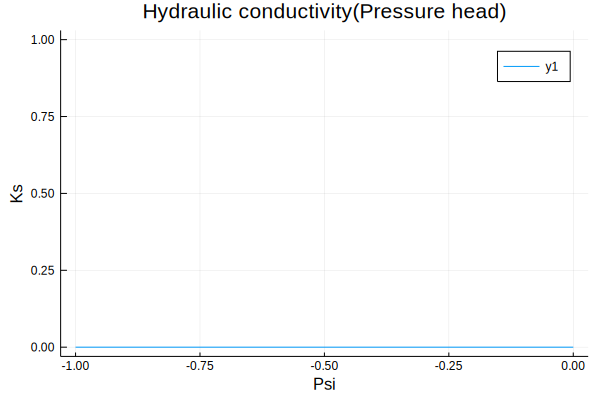

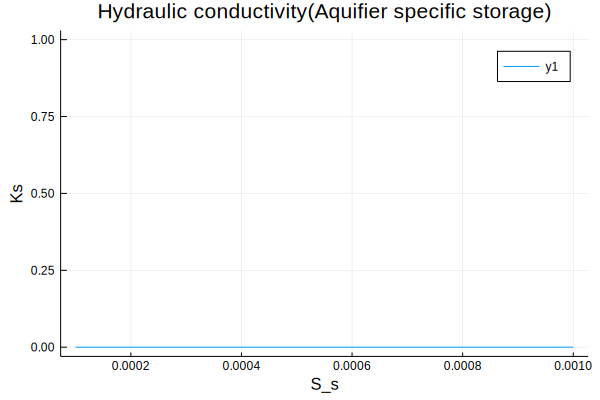

In [25]:
## Hydraulic conductivity

## Define parameters

mineral_properties = "Clay" # "Sand"
np = 100 # number of points to plot
theta_icei = range(0, stop=0.3, length=np)
theta_liqi = range(0, stop=0.3, length=np)
soil_Ti = range(250, stop=300, length=np)
soil_Trefi = range(250, stop=300, length=np)
porosityi = range(0.4, stop=1, length=np)
ψi = range(0, stop=-1, length=np) 
S_si = range(1e-4, stop=10e-4, length=np)  
flag = "van Genuchten" # "Brooks and Corey"

Ks1 = rand(Float64, np)
Ks2 = rand(Float64, np)
Ks3 = rand(Float64, np)
Ks4 = rand(Float64, np)
Ks5 = rand(Float64, np)
Ks6 = rand(Float64, np)
Ks7 = rand(Float64, np)

## Call functions

# Vary soil_T
for i = 1:np
    soil_T = soil_Ti[i] 
    soil_Tref = 298.42 
    theta_liq = 0.1 
    theta_ice = 0.1
    porosity = 0.3 
    ψ = -1 
    S_s = 10e-4 
    Ks1[i] = soil_water_properties(mineral_properties,soil_T,soil_Tref,theta_liq,theta_ice,porosity,ψ,S_s,flag)  
end

# Plot
display(plot(soil_Ti,Ks1,
xlabel = "Soil_T",
ylabel = "Ks",
title  = "Hydraulic conductivity(soil temperature)"))

# Vary soil_Tref
for i = 1:np
    soil_T = 300
    soil_Tref = soil_Trefi[i] 
    theta_liq = 0.1 
    theta_ice = 0.1
    porosity = 0.3 
    ψ = -1 
    S_s = 10e-4 
    Ks2[i] = soil_water_properties(mineral_properties,soil_T,soil_Tref,theta_liq,theta_ice,porosity,ψ,S_s,flag)  
end

# Plot
display(plot(soil_Trefi,Ks2,
xlabel = "Soil_Tref",
ylabel = "Ks",
title  = "Hydraulic conductivity(soil ref temperature)"))

# Vary theta_liq
for i = 1:np
    soil_T = 300
    soil_Tref = 298.42
    theta_liq = theta_liqi[i] 
    theta_ice = 0.1
    porosity = 0.6 
    ψ = -1 
    S_s = 10e-4 
    Ks3[i] = soil_water_properties(mineral_properties,soil_T,soil_Tref,theta_liq,theta_ice,porosity,ψ,S_s,flag)  
end

# Plot
display(plot(theta_liqi,Ks3,
xlabel = "Theta_liq",
ylabel = "Ks",
title  = "Hydraulic conductivity(volume fraction of liquid water)"))

# Vary theta_ice
for i = 1:np
    soil_T = 300
    soil_Tref = 298.42
    theta_liq = 0.1 
    theta_ice = theta_icei[i]
    porosity = 0.6 
    ψ = -1
    S_s = 10e-4 
    Ks4[i] = soil_water_properties(mineral_properties,soil_T,soil_Tref,theta_liq,theta_ice,porosity,ψ,S_s,flag)  
end

# Plot
display(plot(theta_icei,Ks4,
xlabel = "Theta_ice",
ylabel = "Ks",
title  = "Hydraulic conductivity(volume fraction of ice)"))

# Vary porosity
for i = 1:np
    soil_T = 300
    soil_Tref = 298.42
    theta_liq = 0.1 
    theta_ice = 0.1
    porosity = porosityi[i] 
    ψ = -1
    S_s = 10e-4 
    Ks5[i] = soil_water_properties(mineral_properties,soil_T,soil_Tref,theta_liq,theta_ice,porosity,ψ,S_s,flag)  
end

# Plot
display(plot(porosityi,Ks5,
xlabel = "Porosity",
ylabel = "Ks",
title  = "Hydraulic conductivity(porosity)"))

# Vary  ψ
for i = 1:np
    soil_T = 300
    soil_Tref = 298.42
    theta_liq = 0.1 
    theta_ice = 0.1
    porosity = 0.3
    ψ =  ψi[i] 
    S_s = 10e-4 
    Ks6[i] = soil_water_properties(mineral_properties,soil_T,soil_Tref,theta_liq,theta_ice,porosity,ψ,S_s,flag)  
end

# Plot
display(plot(ψi,Ks6,
xlabel = "Psi",
ylabel = "Ks",
title  = "Hydraulic conductivity(Pressure head)"))

# Vary S_s
for i = 1:np
    soil_T = 300
    soil_Tref = 298.42
    theta_liq = 0.1 
    theta_ice = 0.1
    porosity = 0.3
    ψ =  -1
    S_s = S_si[i]
    Ks7[i] = soil_water_properties(mineral_properties,soil_T,soil_Tref,theta_liq,theta_ice,porosity,ψ,S_s,flag)  
end

# Plot
display(plot(S_si,Ks7,
xlabel = "S_s",
ylabel = "Ks",
title  = "Hydraulic conductivity(Aquifier specific storage)"))

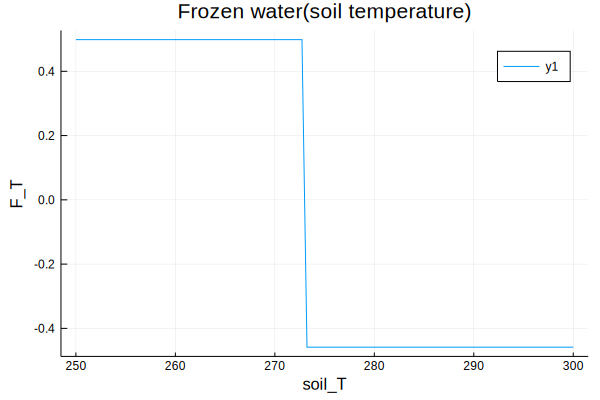

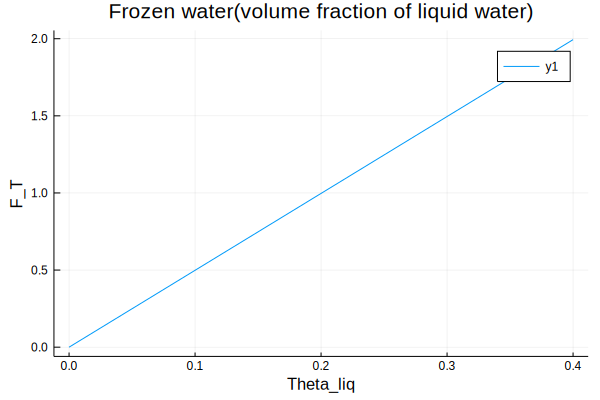

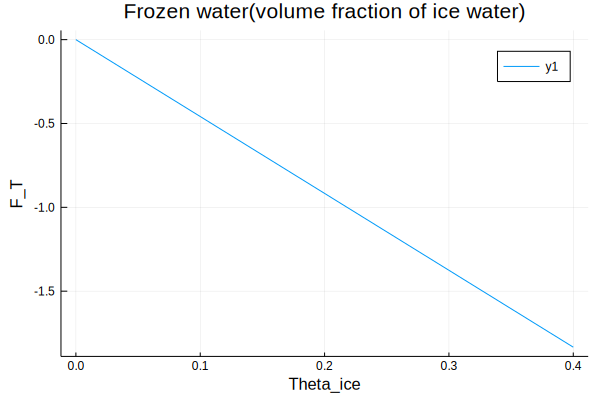

In [28]:
## Define parameters
mineral_properties = "Clay" # "Sand"
np = 100 # number of points to plot
theta_icei = range(0, stop=0.4, length=np)
theta_liqi = range(0, stop=0.4, length=np)
soil_Ti = range(250, stop=300, length=np)

F_T1 = rand(Float64, np)
F_T2 = rand(Float64, np)
F_T3 = rand(Float64, np)

# Vary soil_T
for i = 1:np
    soil_T = soil_Ti[i]
    theta_liq = 0.1 
    theta_ice = 0.1
    F_T1[i] = calculate_frozen_water(theta_liq,theta_ice,soil_T)  
end

# Plot
display(plot(soil_Ti,F_T1,
xlabel = "soil_T",
ylabel = "F_T",
title  = "Frozen water(soil temperature)"))

# Vary theta_liq
for i = 1:np
    soil_T = 265
    theta_liq = theta_liqi[i] 
    theta_ice = 0.1
    F_T2[i] = calculate_frozen_water(theta_liq,theta_ice,soil_T)  
end

# Plot
display(plot(theta_liqi,F_T2,
xlabel = "Theta_liq",
ylabel = "F_T",
title  = "Frozen water(volume fraction of liquid water)"))

# Vary theta_ice
for i = 1:np
    soil_T = 300
    theta_liq = 0.1 
    theta_ice = theta_icei[i]
    F_T3[i] = calculate_frozen_water(theta_liq,theta_ice,soil_T)  
end

# Plot
display(plot(theta_icei,F_T3,
xlabel = "Theta_ice",
ylabel = "F_T",
title  = "Frozen water(volume fraction of ice water)"))

# Source of ice
# sourceθi = F_T/917 # rho_i = 0.917 # g cm-3, density of ice
# sourceθ = -F_T/997 # rho_l = 0.997 # g cm-3, density of water

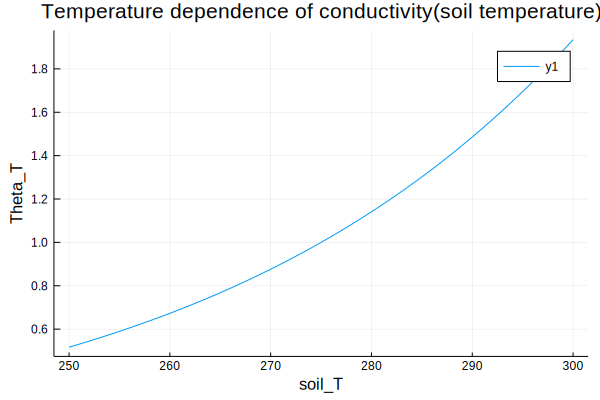

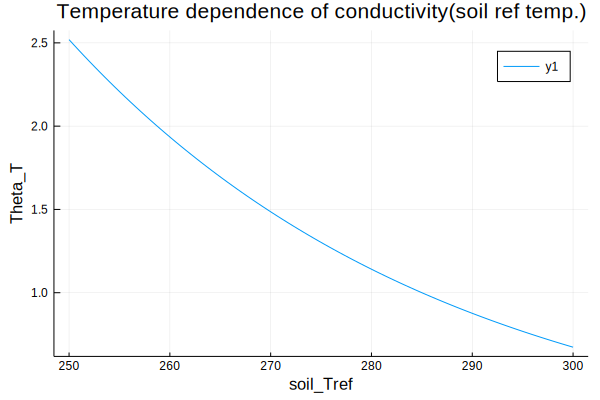

In [6]:
# Temperature dependence of hydraulic conductivity

## Define parameters
np=100
soil_Ti = range(250, stop=300, length=np)
soil_Trefi = range(250, stop=300, length=np)

Theta_T1 = rand(Float64, np)
Theta_T2 = rand(Float64, np)

# Vary soil_T
for i = 1:np
    soil_T = soil_Ti[i] 
    soil_Tref = 275
    Theta_T1[i]= temperature_dependence(soil_T, soil_Tref)  
end

# Plot
display(plot(soil_Ti,Theta_T1,
xlabel = "soil_T",
ylabel = "Theta_T",
title  = "Temperature dependence of conductivity(soil temperature)"))

# Vary soil_Tref
for i = 1:np
    soil_T = 285 
    soil_Tref = soil_Trefi[i]
    Theta_T2[i] = temperature_dependence(soil_T, soil_Tref)  
end

# Plot
display(plot(soil_Trefi,Theta_T2,
xlabel = "soil_Tref",
ylabel = "Theta_T",
title  = "Temperature dependence of conductivity(soil ref temp.)"))

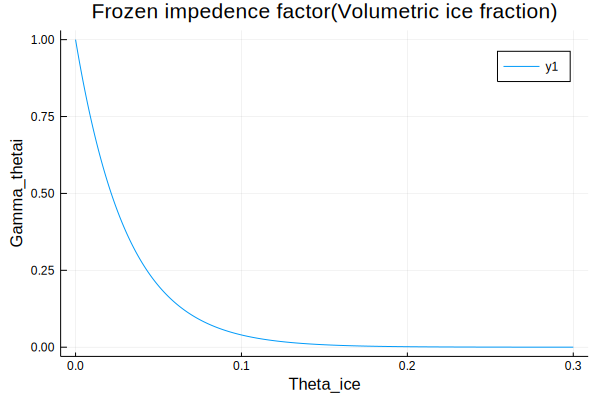

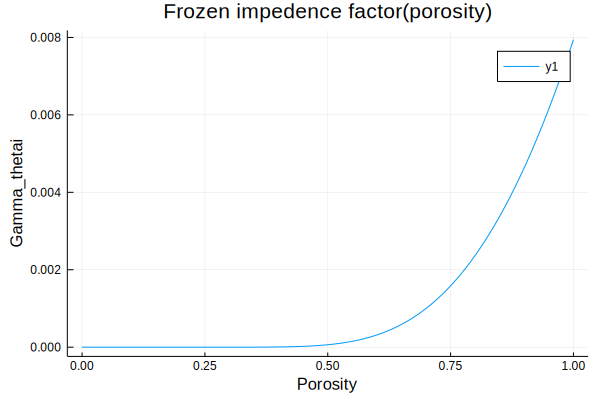

In [7]:
# Frozen soil impedence factor

## Define parameters
np=1000
theta_icei = range(0, stop=0.3, length=np)
porosityi = range(0, stop=1, length=np)
Gamma_thetai1 = rand(Float64, np)
Gamma_thetai2 = rand(Float64, np)

# Vary theta_ice 
for i = 1:np
    theta_ice = theta_icei[i] 
    porosity = 0.5
    Gamma_thetai1[i] = frozen_impedence_factor(theta_ice, porosity)  
end

# Plot
display(plot(theta_icei,Gamma_thetai1,
xlabel = "Theta_ice",
ylabel = "Gamma_thetai",
title  = "Frozen impedence factor(Volumetric ice fraction)"))

# Vary soil_T
for i = 1:np
    theta_ice = 0.3
    porosity = porosityi[i] 
    Gamma_thetai2[i] = frozen_impedence_factor(theta_ice, porosity)  
end

# Plot
display(plot(porosityi,Gamma_thetai2,
xlabel = "Porosity",
ylabel = "Gamma_thetai",
title  = "Frozen impedence factor(porosity)"))

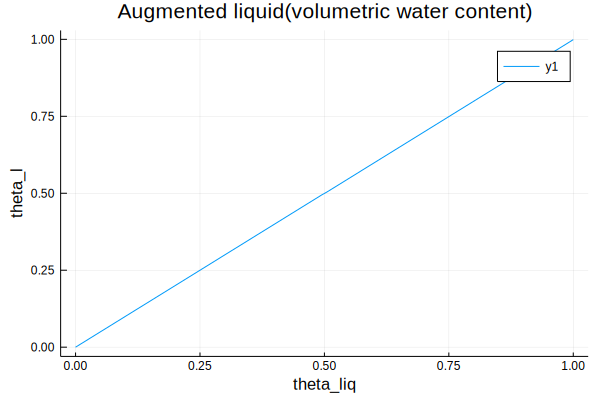

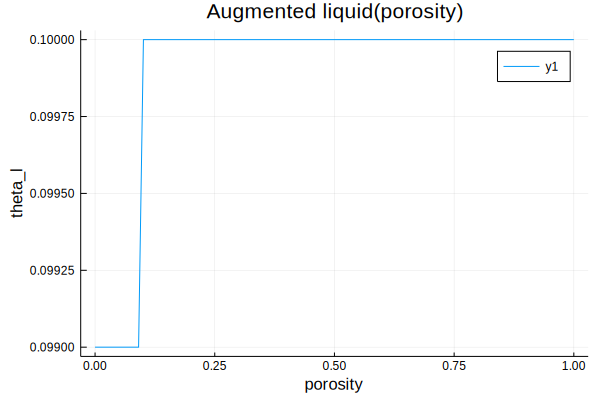

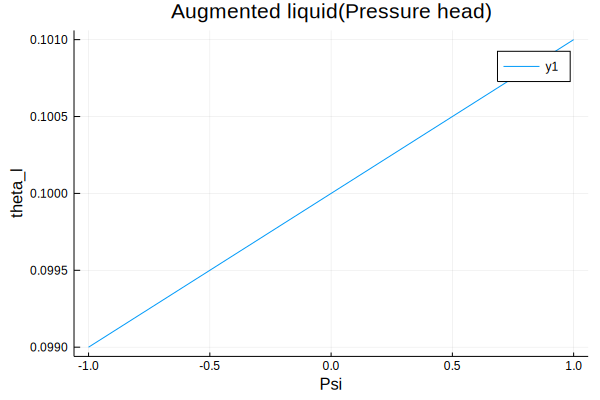

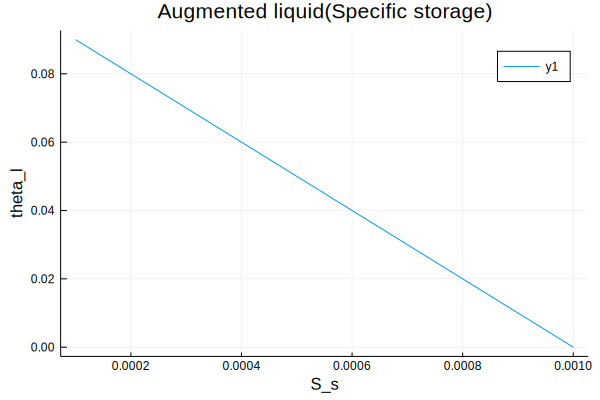

In [8]:
# Augmented_liquid

## Define parameters

np = 100 # number of points to plot
theta_liqi = range(0, stop=1, length=np)
porosityi = range(0, stop=1, length=np)
ψi = range(-1, stop=1, length=np)
S_si = range(1e-4, stop=10e-4, length=np)  

theta_l1 = rand(Float64, np)
theta_l2 = rand(Float64, np)
theta_l3 = rand(Float64, np)
theta_l4 = rand(Float64, np)

# Vary theta_liq
for i = 1:np
    theta_liq = theta_liqi[i] 
    porosity = 0.5 
    ψ = -1 
    S_s = 10e-4 
    theta_l1[i]=augmented_liquid(porosity,S_s,ψ,theta_liq)   
end

# Plot
display(plot(theta_liqi,theta_l1,
xlabel = "theta_liq",
ylabel = "theta_l",
title  = "Augmented liquid(volume fraction of liquid water)"))

# Vary porosity
for i = 1:np
    theta_liq = 0.1 
    porosity = porosityi[i] 
    ψ = -1 
    S_s = 10e-4 
    theta_l2[i] = augmented_liquid(porosity,S_s,ψ,theta_liq)   
end

# Plot
display(plot(porosityi,theta_l2,
xlabel = "porosity",
ylabel = "theta_l",
title  = "Augmented liquid(porosity)"))

# Vary  ψ
for i = 1:np
    theta_liq = 0.1 
    porosity = 0.05
    ψ =  ψi[i] 
    S_s = 10e-4 
    theta_l3[i] = augmented_liquid(porosity,S_s,ψ,theta_liq)   
end

# Plot
display(plot(ψi,theta_l3,
xlabel = "Psi",
ylabel = "theta_l",
title  = "Augmented liquid(pressure head)"))

# Vary S_s
for i = 1:np
    theta_liq = 0.1 
    porosity = 0.05
    ψ =  -100
    S_s = S_si[i]
    theta_l4[i] = augmented_liquid(porosity,S_s,ψ,theta_liq)   
end

# Plot
display(plot(S_si,theta_l4,
xlabel = "S_s",
ylabel = "theta_l",
title  = "Augmented liquid(specific storage)"))


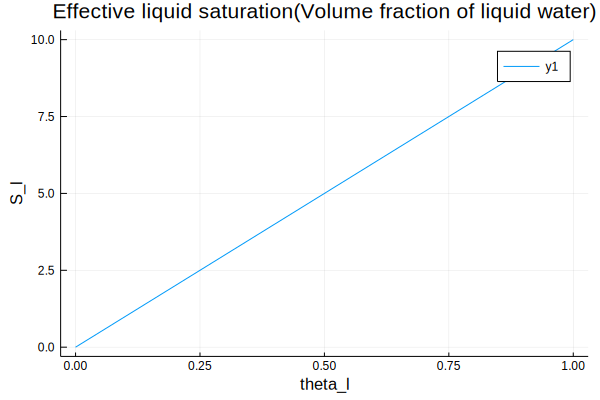

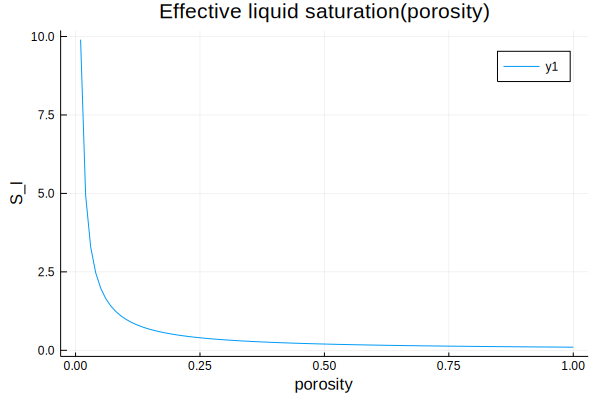

In [13]:
# Effective saturation

## Define parameters
np = 100 # number of points to plot
porosityi = range(0, stop=1, length=np) # 0 to 1
theta_li=range(0, stop=1, length=np) # =>0

S_l1 = rand(Float64, np)
S_l2 = rand(Float64, np)

# Vary theta_liq
for i = 1:np
    theta_l = theta_li[i] 
    porosity = 0.1 
    S_l1[i] = effective_saturation(porosity,theta_l) 
end

# Plot
display(plot(theta_li,S_l1,
xlabel = "theta_l",
ylabel = "S_l",
title  = "Effective liquid saturation(volume fraction of liquid water)"))

# Vary porosity
for i = 1:np
    theta_l = 0.1 
    porosity = porosityi[i] 
    S_l2[i] = effective_saturation(porosity,theta_l)   
end

# Plot
display(plot(porosityi,S_l2,
xlabel = "porosity",
ylabel = "S_l",
title  = "Effective liquid saturation(porosity)"))

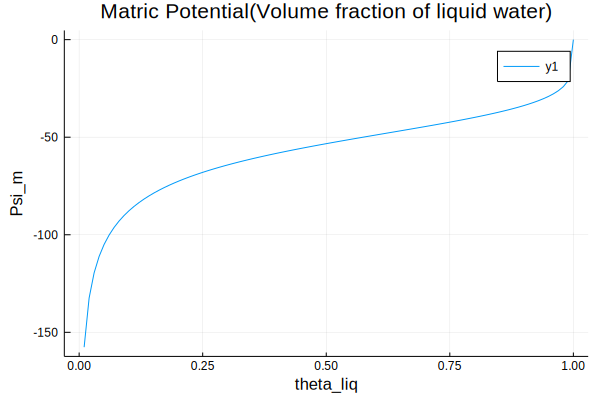

In [10]:
# Soil Matric potential

# Define typical range of parameters
flag = "van Genuchten"
np = 100 # number of points to plot
S_li = range(0, stop=1, length=np) # >0

ψ_m = rand(Float64, np)

# Vary alpha
for i = 1:np
    S_l = S_li[i] 
    ψ_m[i] = matric_potential(flag,S_l)
end

# Plot
display(plot(S_li,ψ_m,
xlabel = "theta_liq",
ylabel = "Psi_m",
title  = "Matric Potential(volume fraction of liquid water)"))


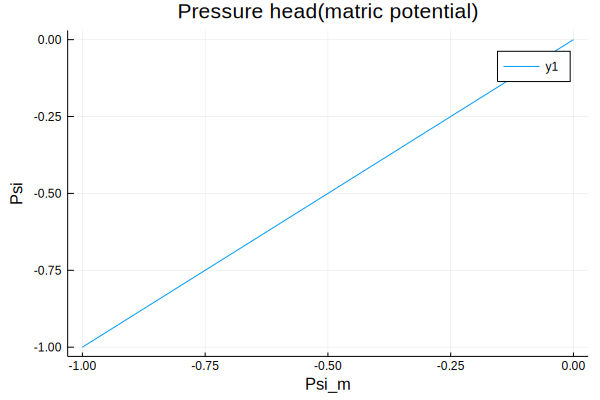

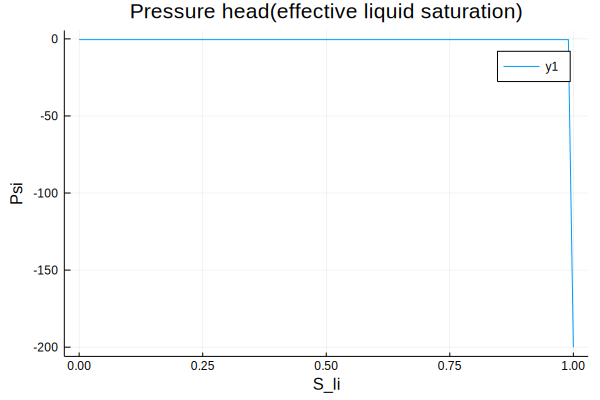

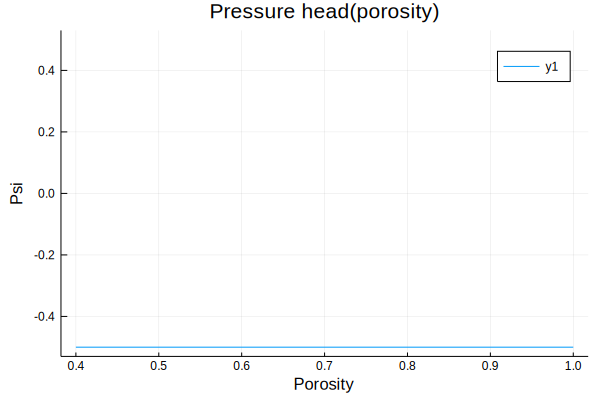

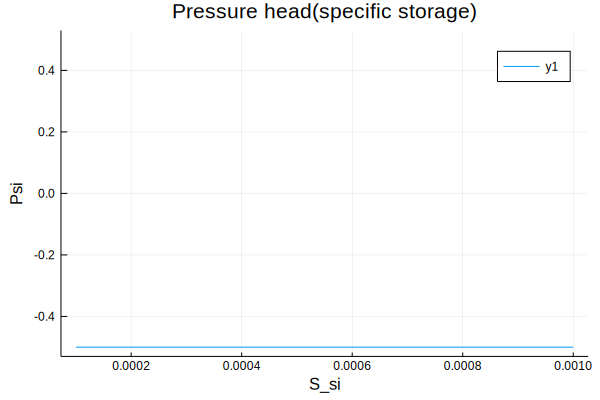

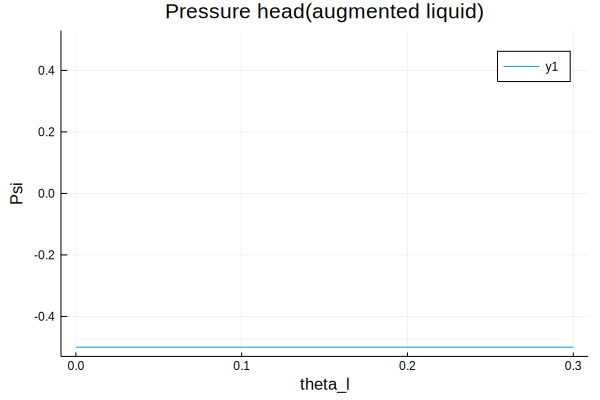

In [27]:
# Matric potential ψ_m

# Define typical range of parameters
np = 100 # number of points to plot
ψ_mi = range(0, stop=-1, length=np) # <0
S_li = range(0, stop=1, length=np) # >0
porosityi = range(0.4, stop=1, length=np) # 0 to 1
S_si= range(1e-4, stop=10e-4, length=np) # >0 (typically 10e-4)
theta_li=range(0, stop=0.3, length=np) # =>0

ψ1 = rand(Float64, np)
ψ2 = rand(Float64, np)
ψ3 = rand(Float64, np)
ψ4 = rand(Float64, np)
ψ5 = rand(Float64, np)

# Vary  ψ_m
for i = 1:np
    ψ_m = ψ_mi[i]
    S_l = 0.3 
    porosity = 0.5
    S_s = 10e-4
    theta_l = 0.3
    ψ1[i] = pressure_head(ψ_m,S_l,porosity,S_s,theta_l) 
end

# Plot
display(plot(ψ_mi,ψ1,
xlabel = "Psi_m",
ylabel = "Psi",
title  = "Pressure head(matric potential)"))

# Vary S_l
for i = 1:np
    ψ_m = -0.5
    S_l =  S_li[i] 
    porosity = 0.5
    S_s = 10e-4
    theta_l = 0.3
    ψ2[i] = pressure_head(ψ_m,S_l,porosity,S_s,theta_l) 
end

# Plot
display(plot(S_li,ψ2,
xlabel = "S_li",
ylabel = "Psi",
title  = "Pressure head(effective liquid saturation)"))

# Vary porosity
for i = 1:np
    ψ_m = -0.5
    S_l =  0.3 
    porosity = porosityi[i]
    S_s = 10e-4
    theta_l = 0.3
    ψ3[i] = pressure_head(ψ_m,S_l,porosity,S_s,theta_l) 
end

# Plot
display(plot(porosityi,ψ3,
xlabel = "Porosity",
ylabel = "Psi",
title  = "Pressure head(porosity)"))

# Vary S_s
for i = 1:np
    ψ_m = -0.5
    S_l =  0.3 
    porosity = 0.5
    S_s = S_si[i]
    theta_l = 0.3
    ψ4[i] = pressure_head(ψ_m,S_l,porosity,S_s,theta_l) 
end

# Plot
display(plot(S_si,ψ4,
xlabel = "S_si",
ylabel = "Psi",
title  = "Pressure head(specific storage)"))

# Vary Theta_l
for i = 1:np
    ψ_m = -0.5
    S_l =  0.3 
    porosity = 0.5
    S_s = 10e-4
    theta_l = theta_li[i]
    ψ5[i] = pressure_head(ψ_m,S_l,porosity,S_s,theta_l) 
end

# Plot
display(plot(theta_li,ψ5,
xlabel = "theta_l",
ylabel = "Psi",
title  = "Pressure head(augmented liquid)"))

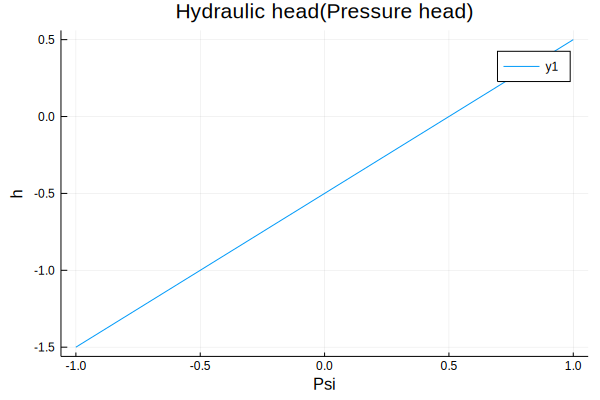

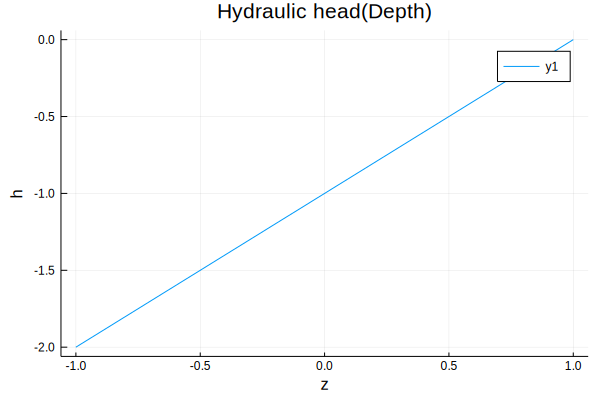

In [5]:
# Hydraulic head

# Define typical range of parameters

np = 100 # number of points to plot
zi = range(-1, stop=1, length=np) 
ψi = range(-1, stop=1, length=np) 

h1 = rand(Float64, np)
h2 = rand(Float64, np)

# Vary ψ
for i = 1:np
    z = -0.5 
    ψ = ψi[i]
    h1[i] = hydraulic_head(z,ψ)
end

# Plot
display(plot(ψi,h1,
xlabel = "Psi",
ylabel = "h",
title  = "Hydraulic head(pressure head)"))

# Vary z
for i = 1:np
    z = zi[i] 
    ψ = -1
    h2[i] = hydraulic_head(z,ψ)
end

# Plot
display(plot(zi,h2,
xlabel = "z",
ylabel = "h",
title  = "Hydraulic head(depth)"))
